In [11]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
import seaborn as sns

In [7]:
sns.heatmap(df.isnull())

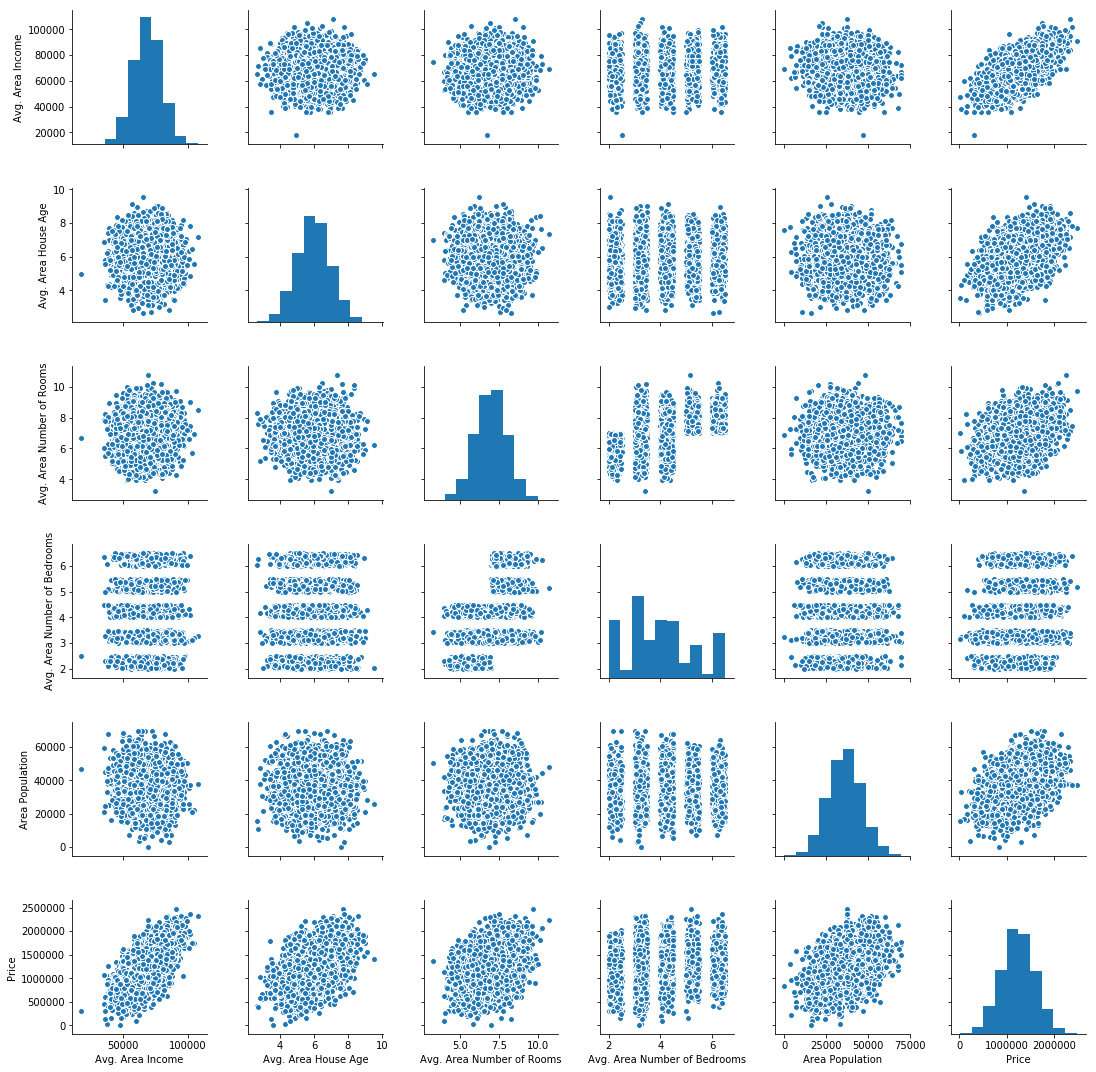

In [50]:
sns.pairplot(df)

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
x = df.drop(['Address','Price'],axis = 1)

In [13]:
x.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [14]:
y = df['Price']

In [15]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
prediction = reg.predict(x_test)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
reg.coef_

array([2.16378083e+01, 1.64890446e+05, 1.21297153e+05, 1.81458942e+03,
       1.52496030e+01])

In [37]:
reg.intercept_

-2643144.2175834766

In [38]:
coeff_df = pd.DataFrame(reg.coef_,x.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.637808
Avg. Area House Age           164890.446294
Avg. Area Number of Rooms     121297.153133
Avg. Area Number of Bedrooms    1814.589421
Area Population                   15.249603

In [40]:
plt.scatter(y_test,prediction)
plt.ylabel('ACTUAL VALUE')
plt.xlabel('PREDICTIONS')

Text(0.5,0,'PREDICTIONS')

In [43]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 81877.46809002008
MSE: 10364756049.5393
RMSE: 101807.44594350307


In [48]:
reg.score(x_test,y_test)

0.9170626478020446